In [15]:
!pip install category_encoders

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier



In [17]:
Data = 'dataset_cleaned.csv'
df = pd.read_csv(Data, sep=";")

In [18]:
print(df.head())

   client_age  contact_duration  contacts_campaign  \
0        33.0              69.0                1.0   
1        25.0             206.0                1.0   
2        25.0             120.0                1.0   
3        57.0             231.0                3.0   
4        59.0             216.0                3.0   

   days_since_previous_contact  previous_contacts  employment_variation_rate  \
0                         -1.0                0.0                       -1.8   
1                         -1.0                0.0                        1.4   
2                         -1.0                0.0                       -1.8   
3                         -1.0                0.0                        1.4   
4                         -1.0                0.0                        1.4   

   consumer_price_index  consumer_confidence_index  euribor_3_months_rate  \
0                92.893                      -46.2               1.540246   
1                93.918                 

In [19]:
print(df.isnull().sum())

client_age                     0
contact_duration               0
contacts_campaign              0
days_since_previous_contact    0
previous_contacts              0
                              ..
period_sep_mon                 0
period_sep_thu                 0
period_sep_tue                 0
period_sep_wed                 0
y                              0
Length: 100, dtype: int64


In [20]:
print(df.dtypes)

client_age                     float64
contact_duration               float64
contacts_campaign              float64
days_since_previous_contact    float64
previous_contacts              float64
                                ...   
period_sep_mon                    bool
period_sep_thu                    bool
period_sep_tue                    bool
period_sep_wed                    bool
y                                int64
Length: 100, dtype: object


In [21]:
print(df.y.unique())

# Vérifier les valeurs vides ou nulles spécifiques
print(df.y.isna().sum())           # Nombre de valeurs NaN
print((df.y == '').sum())          # Nombre de chaînes vides (si y est de type chaîne)


[0 1]
0
0


In [22]:
from sklearn.model_selection import train_test_split

# Séparer les colonnes explicatives (X) et la cible (y)
X = df[['contact_duration', 'euribor_3_months_rate','number_employees','housing_loan_yes',]]
y = df['y']

# Diviser les données en jeu d'entraînement (train) et de test (test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

# Vérification des dimensions
print("Dimensions de X_train :", X_train.shape)
print("Dimensions de X_test :", X_test.shape)
print("Dimensions de y_train :", y_train.shape)
print("Dimensions de y_test :", y_test.shape)

Dimensions de X_train : (34704, 4)
Dimensions de X_test : (17094, 4)
Dimensions de y_train : (34704,)
Dimensions de y_test : (17094,)


In [23]:
X_train.head()

,contact_duration,euribor_3_months_rate,number_employees,housing_loan_yes
15656,280.000000,4.312520,5228.1,1.0
27677,227.000000,4.538462,5228.1,1.0
38797,153.220546,0.605663,5008.7,0.0
20909,1073.000000,0.856714,5099.1,0.0
40036,306.449560,1.347573,5076.2,0.0


In [24]:
import category_encoders as ce

# Colonnes à encoder
initial_cols = ['job', 'marital', 'education', 'default', 'housing',
                'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Filtrer les colonnes existantes
encoder_cols = [col for col in initial_cols if col in X_train.columns]

# Initialiser l'encodeur
encoder = ce.OrdinalEncoder(cols=encoder_cols)

# Appliquer l'encodage
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)



In [25]:
df['y'].value_counts()

,count
y,
0,25899
1,25899


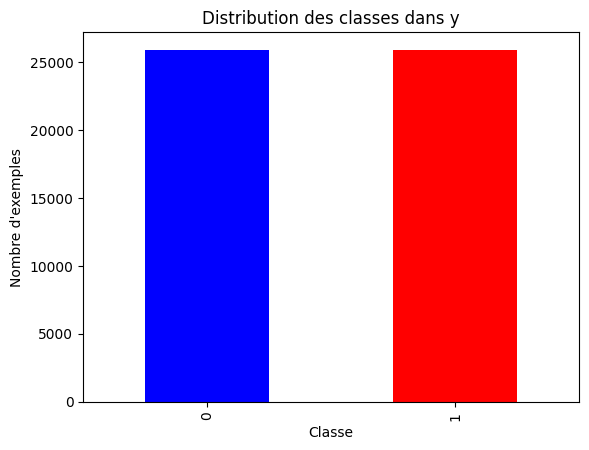

In [26]:
# Vérification de l'équilibre des classes dans y
y.value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title("Distribution des classes dans y")
plt.xlabel("Classe")
plt.ylabel("Nombre d'exemples")
plt.show()

In [27]:
X_train.isnull().sum()


,0
contact_duration,0
euribor_3_months_rate,0
number_employees,0
housing_loan_yes,0


In [28]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)

In [29]:
# clf_best = grid_search.best_estimator_
# importance = clf_best.feature_importances_
# features = X_train.columns

# # Trier par importance
# sorted_idx = importance.argsort()
# sorted_features = [features[i] for i in sorted_idx]
# sorted_importance = importance[sorted_idx]

# # Garder les 10 plus importantes
# top_features = sorted_features[-10:]
# top_importance = sorted_importance[-10:]

# # Visualiser
# plt.figure(figsize=(10, 6))
# plt.barh(top_features, top_importance, color='skyblue')
# plt.xlabel("Importance", fontsize=12)
# plt.ylabel("Caractéristiques", fontsize=12)
# plt.title("Top 10 des caractéristiques importantes", fontsize=14)
# plt.tight_layout()
# plt.show()


In [30]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8449


In [31]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.8474


In [32]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.8474
Test set score: 0.8449


[Text(0.5, 0.875, 'x[0] <= 250.003\ngini = 0.5\nsamples = 34704\nvalue = [17331, 17373]'),
 Text(0.25, 0.625, 'x[2] <= 5087.65\ngini = 0.373\nsamples = 16194\nvalue = [12173, 4021]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[0] <= 124.022\ngini = 0.386\nsamples = 3529\nvalue = [923, 2606]'),
 Text(0.0625, 0.125, 'gini = 0.483\nsamples = 781\nvalue = [462, 319]'),
 Text(0.1875, 0.125, 'gini = 0.279\nsamples = 2748\nvalue = [461, 2287]'),
 Text(0.375, 0.375, 'x[1] <= 3.257\ngini = 0.198\nsamples = 12665\nvalue = [11250, 1415]'),
 Text(0.3125, 0.125, 'gini = 0.443\nsamples = 3828\nvalue = [2560, 1268]'),
 Text(0.4375, 0.125, 'gini = 0.033\nsamples = 8837\nvalue = [8690, 147]'),
 Text(0.75, 0.625, 'x[1] <= 1.835\ngini = 0.402\nsamples = 18510\nvalue = [5158, 13352]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[2] <= 5097.925\ngini = 0.243\nsamples = 9496\nvalue = [1341, 8155]'),
 Text(0.5625, 0.125, 'gini = 0.12\nsamples = 4861\nvalue = [312, 4549]'),
 Text(0.6875, 0

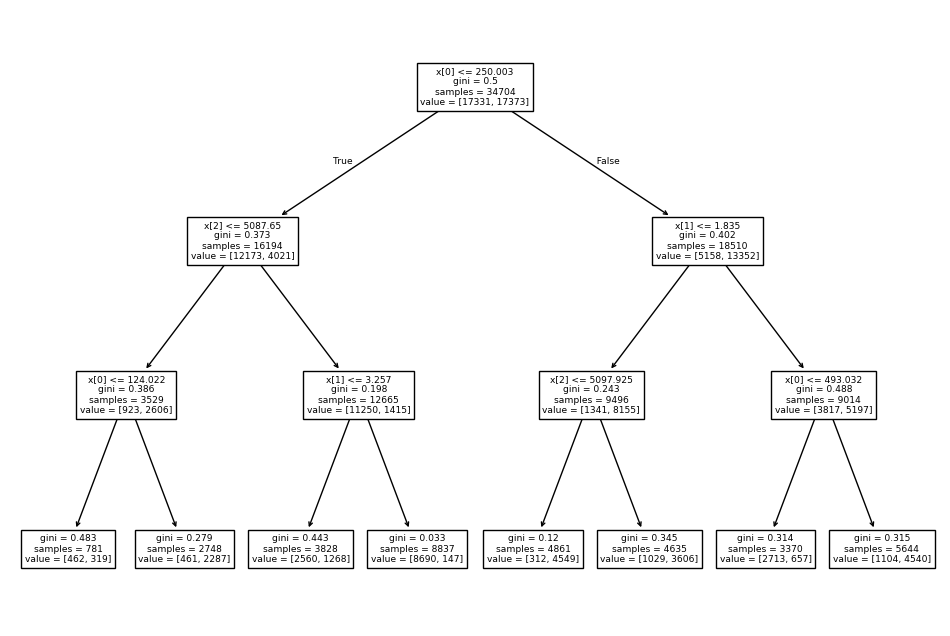

In [33]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

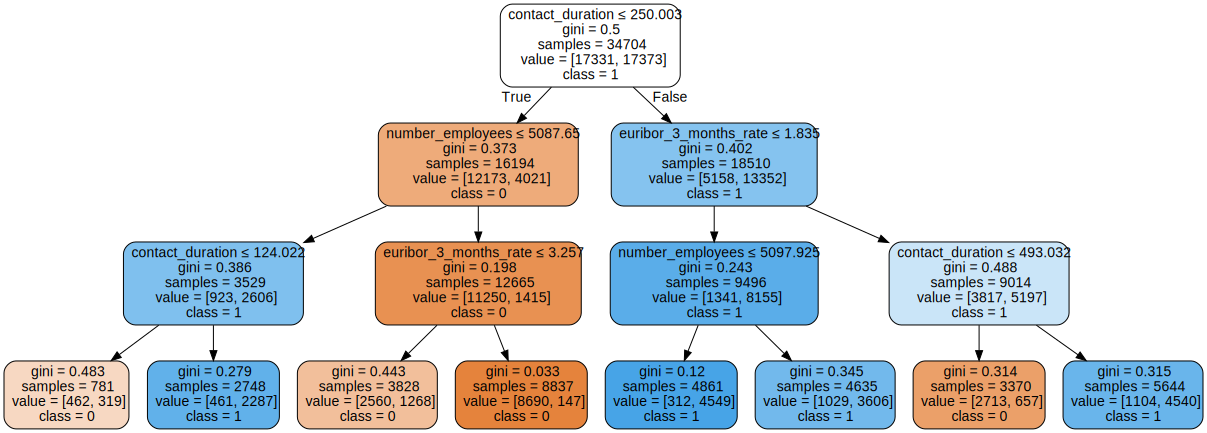

In [34]:
import graphviz
from sklearn import tree

# Convertir y_train en liste de chaînes
class_names = [str(i) for i in y_train.unique()]

dot_data = tree.export_graphviz(clf_gini, out_file=None,
                                feature_names=X_train.columns,
                                class_names=class_names,  # utiliser la liste de chaînes ici
                                filled=True, rounded=True,
                                special_characters=True)

graph = graphviz.Source(dot_data)
graph


***Decision tree classifier with criterion entropy***

In [35]:

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [36]:
y_pred_en = clf_en.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8326


In [38]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array([0, 0, 1, ..., 1, 0, 0])

In [39]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.8320


**Check for overfitting and underfitting**

In [40]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.8320
Test set score: 0.8326


In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.93      0.72      0.81      8568
           1       0.77      0.94      0.85      8526

    accuracy                           0.83     17094
   macro avg       0.85      0.83      0.83     17094
weighted avg       0.85      0.83      0.83     17094



**Visualize decision-trees**

[Text(0.5, 0.875, 'x[0] <= 250.003\nentropy = 1.0\nsamples = 34704\nvalue = [17331, 17373]'),
 Text(0.25, 0.625, 'x[1] <= 3.257\nentropy = 0.809\nsamples = 16194\nvalue = [12173, 4021]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[0] <= 82.27\nentropy = 0.998\nsamples = 7357\nvalue = [3483, 3874]'),
 Text(0.0625, 0.125, 'entropy = 0.254\nsamples = 1032\nvalue = [988, 44]'),
 Text(0.1875, 0.125, 'entropy = 0.968\nsamples = 6325\nvalue = [2495.0, 3830.0]'),
 Text(0.375, 0.375, 'x[2] <= 5219.791\nentropy = 0.122\nsamples = 8837\nvalue = [8690, 147]'),
 Text(0.3125, 0.125, 'entropy = 0.223\nsamples = 3172\nvalue = [3058, 114]'),
 Text(0.4375, 0.125, 'entropy = 0.052\nsamples = 5665\nvalue = [5632, 33]'),
 Text(0.75, 0.625, 'x[1] <= 1.712\nentropy = 0.854\nsamples = 18510\nvalue = [5158, 13352]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[2] <= 5097.925\nentropy = 0.573\nsamples = 9098\nvalue = [1235, 7863]'),
 Text(0.5625, 0.125, 'entropy = 0.342\nsamples = 4834\nvalu

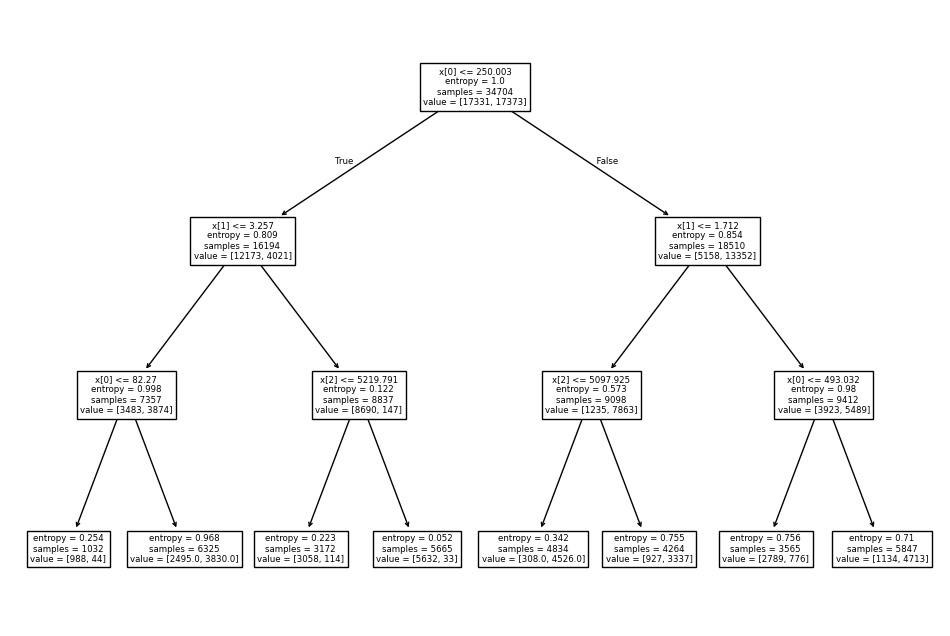

In [42]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

**Visualize decision-trees with graphviz**

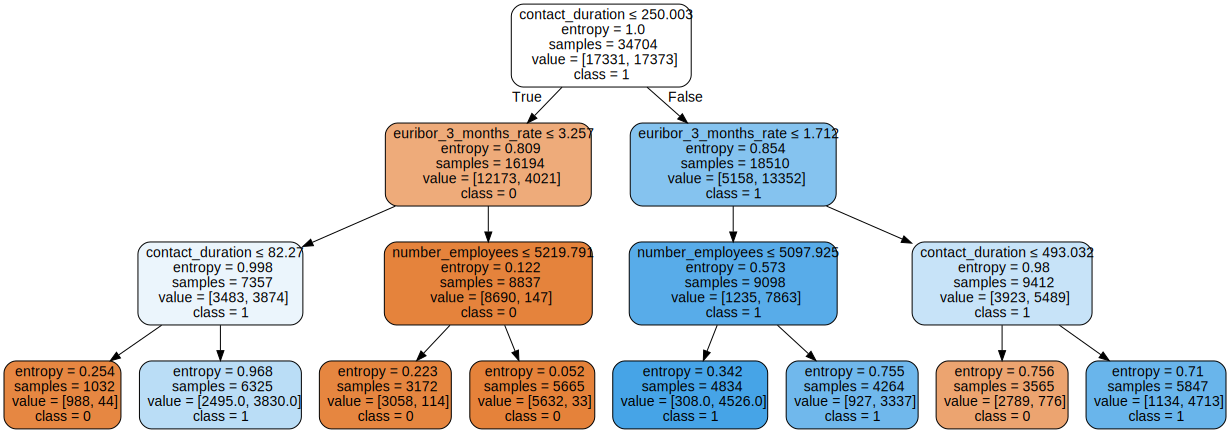

In [43]:
# import graphviz
# dot_data = tree.export_graphviz(clf_en, out_file=None,
#                               feature_names=X_train.columns,
#                               class_names=y_train,
#                               filled=True, rounded=True,
#                               special_characters=True)

# graph = graphviz.Source(dot_data)

# graph
import graphviz
from sklearn import tree

# Convert class labels to a list of strings
class_names = [str(class_name) for class_name in y_train.unique()]

dot_data = tree.export_graphviz(
    clf_en,
    out_file=None,
    feature_names=X_train.columns,
    class_names=class_names,  # Use the converted class names
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph


**Confusion matrix**

In [44]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)


Confusion matrix

 [[6182 2386]
 [ 476 8050]]


**Classification Report**

In [45]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.93      0.72      0.81      8568
           1       0.77      0.94      0.85      8526

    accuracy                           0.83     17094
   macro avg       0.85      0.83      0.83     17094
weighted avg       0.85      0.83      0.83     17094



In [46]:
from sklearn.model_selection import GridSearchCV

# Définir la grille de paramètres
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialiser le modèle
clf = DecisionTreeClassifier(random_state=42)

# Recherche des meilleurs paramètres
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Meilleurs paramètres
print("Meilleurs paramètres :", grid_search.best_params_)

# Prédiction avec le modèle optimisé
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Meilleurs paramètres : {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}


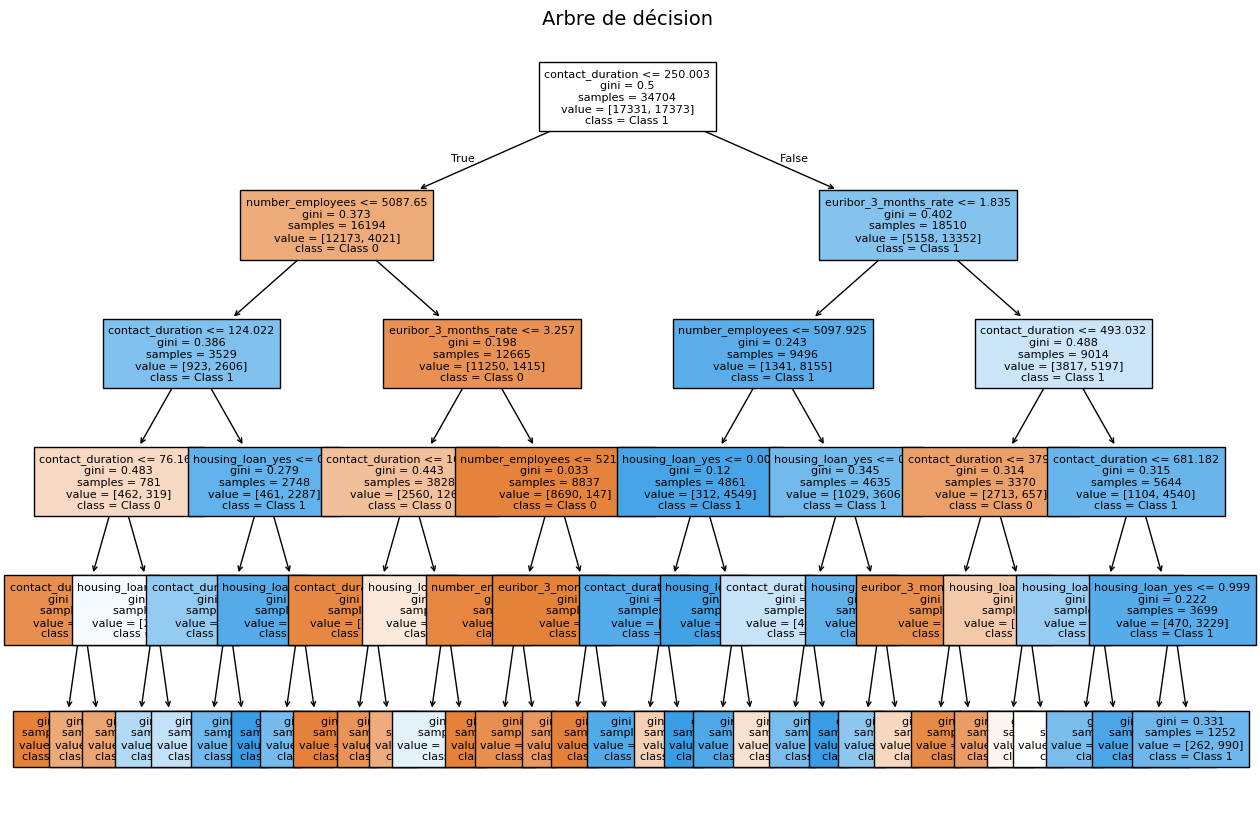

In [47]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree

# Définir les meilleurs paramètres
best_params = {
    'criterion': 'gini',
    'max_depth': 5,
    'min_samples_leaf': 2,
    'min_samples_split': 10
}

# Initialiser le modèle avec les meilleurs paramètres
clf_best = DecisionTreeClassifier(
    criterion=best_params['criterion'],
    max_depth=best_params['max_depth'],
    min_samples_leaf=best_params['min_samples_leaf'],
    min_samples_split=best_params['min_samples_split'],
    random_state=0
)

# Entraîner le modèle
clf_best.fit(X_train, y_train)

# Faire des prédictions
y_pred = clf_best.predict(X_test)



# Visualiser l'arbre de décision
plt.figure(figsize=(15, 10))
tree.plot_tree(clf_best, feature_names=X_train.columns, class_names=['Class 0', 'Class 1'], filled=True, fontsize=8)
plt.title("Arbre de décision", fontsize=14)
plt.show()


In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.93      0.72      0.81      8568
           1       0.77      0.94      0.85      8526

    accuracy                           0.83     17094
   macro avg       0.85      0.83      0.83     17094
weighted avg       0.85      0.83      0.83     17094



In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import category_encoders as ce

categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
print("Colonnes catégoriques détectées :", categorical_cols)

encoder = ce.OrdinalEncoder(cols=categorical_cols)
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

# Initialiser le modèle
model = DecisionTreeClassifier(random_state=42)

# Entraîner le modèle
model.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred_en = model.predict(X_test)

# Évaluer les performances
print(classification_report(y_test, y_pred_en))


Colonnes catégoriques détectées : []
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      8568
           1       0.87      0.88      0.88      8526

    accuracy                           0.88     17094
   macro avg       0.88      0.88      0.88     17094
weighted avg       0.88      0.88      0.88     17094



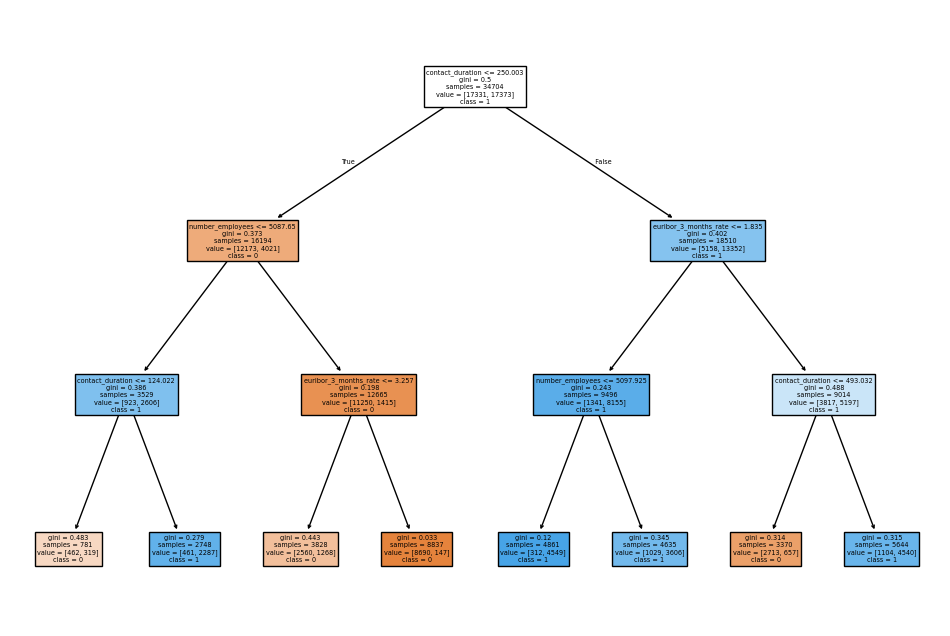

In [50]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Entraînez votre modèle (exemple déjà vu)
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(
    model,
    feature_names=X_train.columns,
    class_names=[str(cls) for cls in model.classes_],  # Convertir en chaînes
    filled=True
)
plt.show()

